# PyTorch 데이터 관리와 모델 저장/불러오기 가이드

이번에는 PyTorch를 사용하여 데이터 관리, 모델 학습, 그리고 학습된 모델을 저장하고 불러오는 과정을 단계별로 진행해보도록 하겠습니다.

데이터셋 생성부터 모델 정의, 학습 루프, 평가, 모델 저장 및 불러오기까지의 전체 과정을 포함하고 있어서 추후에 PyTorch를 활용한 머신러닝 및 딥러닝 프로젝트의 기초를 다지는 데 유용하실 겁니다.

## 1. 데이터 관리

데이터 관리는 머신러닝 및 딥러닝 프로젝트에서 가장 중요한 단계 중 하나입니다. PyTorch는 Dataset과 DataLoader 클래스를 통해 효율적인 데이터 관리를 지원합니다.

### 1.1 기본 개념
- **Dataset**: 데이터를 담는 컨테이너
  - 데이터에 접근하는 방법 정의
  - 각 데이터의 전처리 방법 정의
  - `__len__`과 `__getitem__` 메소드 필수

- **DataLoader**: 데이터를 배치 단위로 제공
  - 미니배치 생성
  - 데이터 섞기(shuffle)
  - 병렬 데이터 로딩

### 1.2 Custom Dataset 정의

torch.utils.data.Dataset을 상속받아 사용자 정의 데이터셋을 정의할 수 있습니다.

이를 통해 다양한 형태의 데이터를 유연하게 처리할 수 있습니다.

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

class SimpleDataset(Dataset):
    def __init__(self, num_samples=1000):
        """
        예제 데이터 생성 (y = 2x + 1 + noise)
        """
        self.x = torch.linspace(-10, 10, num_samples).reshape(-1, 1)
        self.y = 2 * self.x + 1 + torch.randn_like(self.x) * 0.5  # 노이즈 추가

    def __len__(self):
        """
        데이터셋의 크기를 반환
        """
        return len(self.x)

    def __getitem__(self, idx):
        """
        주어진 인덱스에 해당하는 데이터를 반환
        """
        return self.x[idx], self.y[idx]


- `__init__`: 데이터셋의 초기화 메서드로, 여기서는 입력 x와 출력 y를 생성합니다. y는 y = 2x + 1에 노이즈를 추가한 형태입니다.
- `__len__`: 데이터셋의 전체 샘플 수를 반환합니다.
- `__getitem__`: 특정 인덱스의 데이터 (x, y)를 반환합니다.

### 1.3 DataLoader 사용

DataLoader는 Dataset을 배치 단위로 로드하고, 데이터의 섞기(shuffle) 및 병렬 로딩(parallel loading)을 지원합니다.

In [ ]:
# 데이터셋 생성
dataset = SimpleDataset()

# DataLoader 생성
batch_size = 32
train_loader = DataLoader(
    dataset=dataset,
    batch_size=batch_size,
    shuffle=True  # 데이터를 무작위로 섞음
)

### 1.4 데이터 분할 (Train/Test)

모델의 성능을 평가하기 위해 데이터를 학습용(train)과 테스트용(test)으로 분할합니다.

- batch_size: 한 번에 로드할 데이터 샘플 수를 지정합니다.
- shuffle=True: 데이터를 무작위로 섞어 모델 학습의 일반화를 도모합니다.


In [ ]:
from torch.utils.data import random_split

# 전체 데이터셋
full_dataset = SimpleDataset(num_samples=1000)

# 비율 설정 (80% 학습, 20% 테스트)
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

# 데이터 분할
train_dataset, test_dataset = random_split(
    full_dataset,
    [train_size, test_size]
)

# 각각의 DataLoader 생성
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"학습 데이터 크기: {len(train_dataset)}")
print(f"테스트 데이터 크기: {len(test_dataset)}")


학습 데이터 크기: 800
테스트 데이터 크기: 200


- random_split: 주어진 데이터셋을 지정된 비율대로 무작위로 분할합니다.
- shuffle=True는 학습 데이터에만 적용되어, 테스트 데이터는 shuffle=False로 설정하여 일관성을 유지합니다.

### 1-5. 데이터 시각화

학습 데이터를 시각화하여 데이터의 분포를 이해합니다.

배치 크기: torch.Size([32, 1])
X 배치 평균: -0.3735
Y 배치 평균: 0.1892


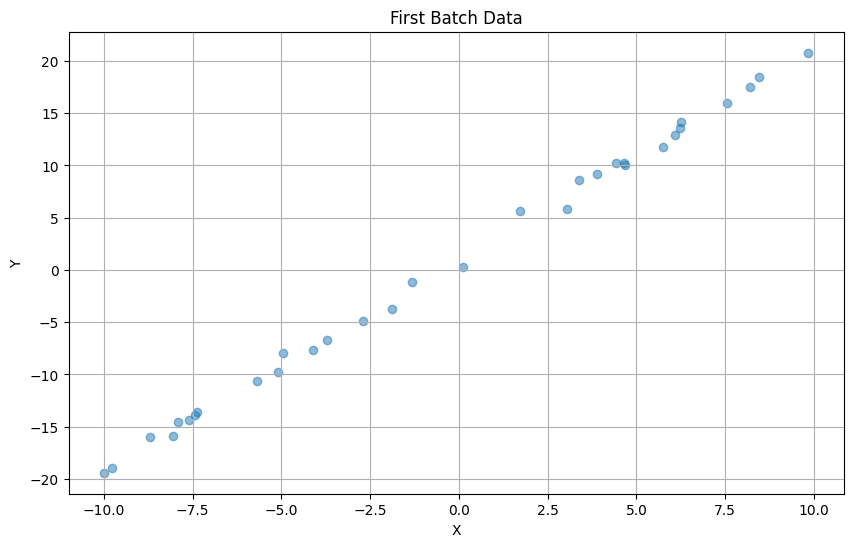

In [ ]:
# 배치 데이터 확인
for batch_idx, (x_batch, y_batch) in enumerate(train_loader):
    if batch_idx == 0:  # 첫 번째 배치만 출력
        print(f"배치 크기: {x_batch.shape}")
        print(f"X 배치 평균: {x_batch.mean():.4f}")
        print(f"Y 배치 평균: {y_batch.mean():.4f}")
        break

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x_batch.numpy(), y_batch.numpy(), alpha=0.5)
plt.title('First Batch Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


- 첫 번째 배치의 크기와 평균 값을 출력하여 데이터 로딩이 올바르게 되었는지 확인합니다.
- matplotlib을 사용하여 배치 데이터를 산점도로 시각화합니다.

**DataLoader 파라미터 설명:**
- `dataset`: 사용할 데이터셋
- `batch_size`: 배치 크기
- `shuffle`: 데이터 섞기 여부
- `num_workers`: 병렬 처리 워커 수

## 2. 모델 정의

PyTorch에서는 torch.nn.Module을 상속받아 모델을 정의합니다.

여기서는 단순한 선형 회귀 모델을 정의합니다.

In [ ]:
import torch.nn as nn

# 간단한 모델 정의
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # 입력 1개, 출력 1개인 선형 레이어

    def forward(self, x):
        return self.linear(x)


- nn.Linear(1, 1): 입력 차원 1, 출력 차원 1인 선형 레이어를 생성합니다.
- forward: 모델의 순전파 과정을 정의합니다. 여기서는 단순히 선형 레이어를 통과시킵니다.

## 3. 학습 및 평가

모델을 학습하고, 학습된 모델을 평가하는 과정을 구현합니다.



### 3-1. 훈련 함수

훈련 데이터를 사용하여 모델을 학습합니다.

In [ ]:
# 모델, 손실함수, 옵티마이저 설정
model = SimpleModel()
criterion = nn.MSELoss()  # 평균 제곱 오차 손실 함수
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 확률적 경사 하강법 옵티마이저

# 학습 함수
def train_epoch(model, train_loader, criterion, optimizer):
    model.train()  # 모델을 학습 모드로 설정
    total_loss = 0
    for x_batch, y_batch in train_loader:
        # 순전파
        predictions = model(x_batch)
        loss = criterion(predictions, y_batch)

        # 역전파 및 최적화
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(train_loader)


- model.train(): 모델을 학습 모드로 설정하여 학습 시 필요한 동작을 활성화합니다.

- optimizer.zero_grad(): 이전 단계의 기울기를 초기화합니다.

- loss.backward(): 손실 함수의 기울기를 계산합니다.

- optimizer.step(): 계산된 기울기를 사용하여 모델의 파라미터를 업데이트합니다.

- total_loss: 에포크 동안의 총 손실을 누적하여 평균 손실을 계산합니다.

### 3-2. 평가 함수

테스트 데이터를 사용하여 모델의 성능을 평가합니다.

In [ ]:
# 평가 함수
def evaluate(model, test_loader, criterion):
    model.eval()  # 모델을 평가 모드로 설정
    total_loss = 0
    with torch.no_grad():  # 그래디언트 계산 비활성화
        for x_batch, y_batch in test_loader:
            predictions = model(x_batch)
            loss = criterion(predictions, y_batch)
            total_loss += loss.item()

    return total_loss / len(test_loader)


- model.eval(): 모델을 평가 모드로 설정하여 드롭아웃(dropout) 등 평가 시 필요한 동작을 활성화합니다.

- torch.no_grad(): 평가 시에는 그래디언트 계산을 비활성화하여 메모리와 계산 효율성을 높입니다.

- total_loss: 전체 테스트 데이터에 대한 평균 손실을 계산합니다.

### 3-3. 훈련 루프

정의된 훈련 및 평가 함수를 사용하여 모델을 여러 에포크 동안 학습시킵니다.

In [ ]:
# 훈련 루프 및 체크포인트 저장
num_epochs = 20  # 원하는 에포크 수 설정

for epoch in range(1, num_epochs + 1):
    train_loss = train_epoch(model, train_loader, criterion, optimizer)
    test_loss = evaluate(model, test_loader, criterion)

    print(f"Epoch {epoch}/{num_epochs} - Train Loss: {train_loss:.4f} - Test Loss: {test_loss:.4f}")

    # 체크포인트 저장 (예: 매 5 에포크마다 저장)
    if epoch % 5 == 0:
        checkpoint = {
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_loss': train_loss,
            'test_loss': test_loss
        }
        torch.save(checkpoint, f'checkpoint_epoch_{epoch}.pth')
        print(f"Checkpoint saved at epoch {epoch}")


Epoch 1/20 - Train Loss: 5.5984 - Test Loss: 1.4053
Epoch 2/20 - Train Loss: 0.9988 - Test Loss: 0.6786
Epoch 3/20 - Train Loss: 0.5259 - Test Loss: 0.4218
Epoch 4/20 - Train Loss: 0.3537 - Test Loss: 0.3074
Epoch 5/20 - Train Loss: 0.2917 - Test Loss: 0.2739
Checkpoint saved at epoch 5
Epoch 6/20 - Train Loss: 0.2702 - Test Loss: 0.2581
Epoch 7/20 - Train Loss: 0.2591 - Test Loss: 0.2550
Epoch 8/20 - Train Loss: 0.2579 - Test Loss: 0.2498
Epoch 9/20 - Train Loss: 0.2548 - Test Loss: 0.2608
Epoch 10/20 - Train Loss: 0.2533 - Test Loss: 0.2496
Checkpoint saved at epoch 10
Epoch 11/20 - Train Loss: 0.2516 - Test Loss: 0.2562
Epoch 12/20 - Train Loss: 0.2529 - Test Loss: 0.2494
Epoch 13/20 - Train Loss: 0.2569 - Test Loss: 0.2483
Epoch 14/20 - Train Loss: 0.2589 - Test Loss: 0.2818
Epoch 15/20 - Train Loss: 0.2537 - Test Loss: 0.2660
Checkpoint saved at epoch 15
Epoch 16/20 - Train Loss: 0.2528 - Test Loss: 0.2551
Epoch 17/20 - Train Loss: 0.2509 - Test Loss: 0.2505
Epoch 18/20 - Train Lo

- num_epochs: 모델을 학습할 총 에포크 수를 설정합니다.
- 에포크마다 훈련 손실(train_loss)과 테스트 손실(test_loss)을 계산하고 출력합니다.
- 매 5 에포크마다 현재 상태를 체크포인트로 저장합니다.

## 4. 모델 저장 및 불러오기

학습된 모델을 저장하고, 필요 시 불러오는 과정은 모델의 재사용과 배포에 필수적입니다.

PyTorch는 다양한 방법으로 모델을 저장하고 불러올 수 있습니다.

### 4-1. 전체 모델 저장

모델 전체를 저장하면, 모델의 구조와 파라미터를 모두 저장할 수 있습니다.

단, 이 방식은 모델의 구조가 변경되면 유연성이 떨어질 수 있습니다.

In [ ]:
# 전체 모델 저장
torch.save(model, 'full_model.pth')


#### 불러오기

In [ ]:
# 전체 모델 불러오기
loaded_model = torch.load('full_model.pth')
loaded_model.eval()  # 평가 모드로 설정


<ipython-input-10-9f488cc0b19f>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load('full_model.pth')


SimpleModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

장단점:

- 장점: 모델 구조와 파라미터가 모두 저장되므로, 불러올 때 별도의 모델 정의가 필요 없습니다.
- 단점: 코드가 변경되면 불러오기 어려울 수 있으며, 유연성이 떨어집니다.

### 4-2. 모델 파라미터만 저장

모델의 파라미터만 저장하여, 추후에 동일한 모델 구조를 정의한 후 파라미터를 불러올 수 있습니다. 이 방식은 코드의 유연성을 높여줍니다.

In [ ]:
# 모델 파라미터만 저장
torch.save(model.state_dict(), 'model_params.pth')


#### 불러오기

In [ ]:
# 모델 파라미터만 불러오기
model = SimpleModel()
model.load_state_dict(torch.load('model_params.pth'))
model.eval()  # 평가 모드로 설정

<ipython-input-12-7b82af710bd2>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_params.pth'))


SimpleModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

장단점:

- 장점: 코드와 모델 파라미터를 분리하여 관리할 수 있어 유연성이 높습니다.
- 단점: 모델 구조를 정확히 동일하게 정의해야 합니다.


### 4-3. 체크포인트 저장

체크포인트는 모델의 현재 상태뿐만 아니라, 옵티마이저의 상태, 현재 에포크 수, 손실 값 등을 함께 저장할 수 있어, 학습을 중단 후 재개할 때 유용합니다.

In [ ]:
# 체크포인트 저장 (훈련 루프 내부에서 매 5 에포크마다 저장)
checkpoint = {
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_loss': train_loss,
    'test_loss': test_loss
}
torch.save(checkpoint, f'checkpoint_epoch_{epoch}.pth')


장단점:

- 장점: 학습을 중단한 지점부터 재개할 수 있으며, 모델과 옵티마이저의 상태를 모두 저장하므로 완전한 복원이 가능합니다.
- 단점: 파일 크기가 커질 수 있으며, 체크포인트 관리를 추가로 해야 합니다.

### 4-4. 모델 불러오기
저장된 모델이나 파라미터를 불러올 때는, 저장된 방식에 따라 적절한 불러오기 방법을 선택해야 합니다.

#### 전체 모델 불러오기

In [ ]:
loaded_model = torch.load('full_model.pth')
loaded_model.eval()

<ipython-input-14-ebe312594399>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load('full_model.pth')


SimpleModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

#### 모델 파라미터만 불러오기

In [ ]:
model = SimpleModel()
model.load_state_dict(torch.load('model_params.pth'))
model.eval()


<ipython-input-15-2675a09989d1>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_params.pth'))


SimpleModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

#### 체크포인트 불러오기:

In [ ]:
checkpoint = torch.load('checkpoint_epoch_20.pth')
model = SimpleModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
train_loss = checkpoint['train_loss']
test_loss = checkpoint['test_loss']

model.eval()


<ipython-input-16-6ae7afb1d60d>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('checkpoint_epoch_20.pth')


SimpleModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

## 5. 전체 코드 예제

아래는 위에서 설명한 모든 단계를 통합한 전체 코드 예제입니다.

이 코드는 데이터셋 생성, 데이터 로더 설정, 모델 정의, 학습 및 평가, 그리고 모델 저장 과정을 포함합니다.

첫 번째 데이터:
x: -10.0000, y: -18.8297

데이터셋 크기: 1000
배치 크기: torch.Size([32, 1])
X 배치 평균: -1.3382
Y 배치 평균: -1.8460


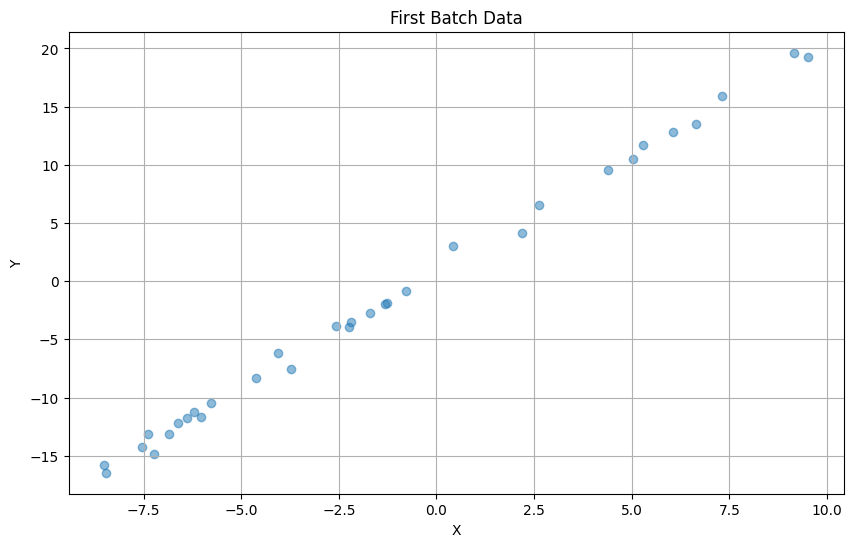

학습 데이터 크기: 800
테스트 데이터 크기: 200
Epoch 1/20 - Train Loss: 3.9185 - Test Loss: 0.5487
Epoch 2/20 - Train Loss: 0.4341 - Test Loss: 0.3443
Epoch 3/20 - Train Loss: 0.3125 - Test Loss: 0.2725
Epoch 4/20 - Train Loss: 0.2675 - Test Loss: 0.2374
Epoch 5/20 - Train Loss: 0.2546 - Test Loss: 0.2254
Checkpoint saved at epoch 5
Epoch 6/20 - Train Loss: 0.2475 - Test Loss: 0.2209
Epoch 7/20 - Train Loss: 0.2436 - Test Loss: 0.2202
Epoch 8/20 - Train Loss: 0.2505 - Test Loss: 0.2159
Epoch 9/20 - Train Loss: 0.2417 - Test Loss: 0.2156
Epoch 10/20 - Train Loss: 0.2413 - Test Loss: 0.2231
Checkpoint saved at epoch 10
Epoch 11/20 - Train Loss: 0.2413 - Test Loss: 0.2150
Epoch 12/20 - Train Loss: 0.2446 - Test Loss: 0.2175
Epoch 13/20 - Train Loss: 0.2428 - Test Loss: 0.2156
Epoch 14/20 - Train Loss: 0.2447 - Test Loss: 0.2162
Epoch 15/20 - Train Loss: 0.2456 - Test Loss: 0.2145
Checkpoint saved at epoch 15
Epoch 16/20 - Train Loss: 0.2407 - Test Loss: 0.2148
Epoch 17/20 - Train Loss: 0.2401 - Test Loss

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

# 1. 데이터셋 정의
class SimpleDataset(Dataset):
    def __init__(self, num_samples=1000):
        # 예제 데이터 생성 (y = 2x + 1 + noise)
        self.x = torch.linspace(-10, 10, num_samples).reshape(-1, 1)
        self.y = 2 * self.x + 1 + torch.randn_like(self.x) * 0.5  # 노이즈 추가

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

# 데이터셋 생성
dataset = SimpleDataset()

# 데이터 확인
x, y = dataset[0]  # 첫 번째 데이터 포인트
print("첫 번째 데이터:")
print(f"x: {x.item():.4f}, y: {y.item():.4f}")

# 전체 데이터 크기
print(f"\n데이터셋 크기: {len(dataset)}")

# DataLoader 생성
batch_size = 32
train_loader = DataLoader(
    dataset=dataset,
    batch_size=batch_size,
    shuffle=True
)

# 배치 데이터 확인
for batch_idx, (x_batch, y_batch) in enumerate(train_loader):
    if batch_idx == 0:  # 첫 번째 배치만 출력
        print(f"배치 크기: {x_batch.shape}")
        print(f"X 배치 평균: {x_batch.mean():.4f}")
        print(f"Y 배치 평균: {y_batch.mean():.4f}")
        break

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x_batch.numpy(), y_batch.numpy(), alpha=0.5)
plt.title('First Batch Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

# 데이터 분리 (학습/테스트)
full_dataset = SimpleDataset(num_samples=1000)

# 비율 설정
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

# 데이터 분할
train_dataset, test_dataset = random_split(
    full_dataset,
    [train_size, test_size]
)

# 각각의 DataLoader 생성
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"학습 데이터 크기: {len(train_dataset)}")
print(f"테스트 데이터 크기: {len(test_dataset)}")

# 2. 모델 정의
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # 입력 1개, 출력 1개인 선형 레이어

    def forward(self, x):
        return self.linear(x)

# 모델, 손실함수, 옵티마이저 설정
model = SimpleModel()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 3. 훈련 함수
def train_epoch(model, train_loader, criterion, optimizer):
    model.train()
    total_loss = 0
    for x_batch, y_batch in train_loader:
        # 순전파
        predictions = model(x_batch)
        loss = criterion(predictions, y_batch)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(train_loader)

# 4. 평가 함수
def evaluate(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            predictions = model(x_batch)
            loss = criterion(predictions, y_batch)
            total_loss += loss.item()

    return total_loss / len(test_loader)

# 5. 훈련 루프 및 체크포인트 저장
num_epochs = 20  # 원하는 에포크 수 설정

for epoch in range(1, num_epochs + 1):
    train_loss = train_epoch(model, train_loader, criterion, optimizer)
    test_loss = evaluate(model, test_loader, criterion)

    print(f"Epoch {epoch}/{num_epochs} - Train Loss: {train_loss:.4f} - Test Loss: {test_loss:.4f}")

    # 체크포인트 저장 (예: 매 5 에포크마다 저장)
    if epoch % 5 == 0:
        checkpoint = {
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_loss': train_loss,
            'test_loss': test_loss
        }
        torch.save(checkpoint, f'checkpoint_epoch_{epoch}.pth')
        print(f"Checkpoint saved at epoch {epoch}")

# 6. 최종 모델 저장
# 전체 모델 저장
torch.save(model, 'full_model.pth')

# 모델 파라미터만 저장
torch.save(model.state_dict(), 'model_params.pth')

print("모델 저장 완료.")


## 6. 과제

### 과제 1: 단일 레이어 신경망 실습

1. 목표: 단일 레이어 신경망을 구현하고, 임의의 입력값에 대해 출력값을 계산해보세요.

2. 단계:
- nn.Linear를 사용하여 입력 노드 2개, 출력 노드 1개인 레이어를 생성하세요.
- 입력값으로 [1.0, 2.0]을 정의하고, 모델을 통해 출력값을 계산하세요.
- 가중치와 바이어스를 출력하여 확인하세요.

3. 확인 사항:
- 출력값이 $y = x1 * weight1 + x2 * weight2 + bias$의 형태로 계산되는지 확인하세요.

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import random_split
import torch.nn as nn

class SimpleDataset(Dataset):
    def __init__(self, num_samples=1000):
        self.x = torch.linspace(-10, 10, num_samples).reshape(-1, 2)
        self.y = 2 * self.x + 1 + torch.randn_like(self.x) * 0.5

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

full_dataset = SimpleDataset(num_samples = 1000)

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = random_split(
    full_dataset,
    [train_size, test_size]
)

train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = True)

print(train_loader.dataset.dataset.x.shape)

class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)

model = SimpleModel()
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr = 0.01)


def train_epoch(model, train_loader, criterion, optimizer):
    model.train()
    total_loss = 0
    for x_batch, y_batch in train_loader:
        predications = model(x_batch)
        loss = criterion(predications, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        total_loss += loss.item()
    return total_loss / len(train_loader)

def evaluate(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            predictions = model(x_batch)
            loss = criterion(predictions, y_batch)
            total_loss = loss.item()
    return total_loss / len(test_loader)

num_epochs = 20

for epoch in range(1, num_epochs + 1):
    train_loss = train_epoch(model, train_loader, criterion, optimizer)
    test_loss = evaluate(model, test_loader, criterion)

    print(f"Epoch {epoch}/{num_epochs} - Train Loss: {train_loss:.4f} - Test Loss: {test_loss: .4f}")

    if epoch % 5 == 0:
      checkpoint = {
          'epoch': epoch,
          'model_state_dict': model.state_dict(),
          'optimizer_state_dict': optimizer.state_dict(),
          'train_loss': train_loss,
          'test_loss': test_loss
      }
      torch.save(checkpoint, f'checkpoint_epoch_{epoch}.pth')
      print(f"Checkpoint saved at epoch {epoch}")


torch.Size([500, 2])
Epoch 1/20 - Train Loss: 184.0148 - Test Loss:  53.5974
Epoch 2/20 - Train Loss: 145.6889 - Test Loss:  22.7800
Epoch 3/20 - Train Loss: 115.5657 - Test Loss:  37.4654
Epoch 4/20 - Train Loss: 88.5394 - Test Loss:  15.9401
Epoch 5/20 - Train Loss: 67.6180 - Test Loss:  5.6326
Checkpoint saved at epoch 5
Epoch 6/20 - Train Loss: 49.1259 - Test Loss:  10.9773
Epoch 7/20 - Train Loss: 35.9045 - Test Loss:  9.2848
Epoch 8/20 - Train Loss: 25.9985 - Test Loss:  7.4454
Epoch 9/20 - Train Loss: 18.6374 - Test Loss:  2.0599


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([32, 2])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([16, 2])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([4, 2])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss

Epoch 10/20 - Train Loss: 12.7466 - Test Loss:  1.4644
Checkpoint saved at epoch 10
Epoch 11/20 - Train Loss: 8.8186 - Test Loss:  2.7473
Epoch 12/20 - Train Loss: 5.9755 - Test Loss:  1.4667
Epoch 13/20 - Train Loss: 4.0372 - Test Loss:  1.7196
Epoch 14/20 - Train Loss: 2.7190 - Test Loss:  0.5497
Epoch 15/20 - Train Loss: 1.8941 - Test Loss:  0.5773
Checkpoint saved at epoch 15
Epoch 16/20 - Train Loss: 1.3019 - Test Loss:  0.2225
Epoch 17/20 - Train Loss: 0.9476 - Test Loss:  0.2957
Epoch 18/20 - Train Loss: 0.7128 - Test Loss:  0.1015
Epoch 19/20 - Train Loss: 0.5681 - Test Loss:  0.1809
Epoch 20/20 - Train Loss: 0.4663 - Test Loss:  0.1256
Checkpoint saved at epoch 20


In [ ]:
print(test_loader.dataset.dataset.x.shape)

x = torch.tensor([[0.1, 0.2]])

with torch.no_grad():
    pred = model(x)
    print(f"출력값: {pred.item()}")
print("=====================")
print(model.parameters)
print(model.linear.weight)
print(model.linear.bias)
print("=====================")

W = model.linear.weight
b = model.linear.bias

print(torch.mm(x, W.T) + b)


# 출력값: 1.0284932851791382
# =====================
# <bound method Module.parameters of SimpleModel(
#   (linear): Linear(in_features=2, out_features=1, bias=True)
# )>
# Parameter containing:
# tensor([[0.7956, 1.1543]], requires_grad=True)
# Parameter containing:
# tensor([0.7181], requires_grad=True)
# =====================
# tensor([[1.0285]], grad_fn=<AddBackward0>)

torch.Size([500, 2])
출력값: 1.0284932851791382
<bound method Module.parameters of SimpleModel(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)>
Parameter containing:
tensor([[0.7956, 1.1543]], requires_grad=True)
Parameter containing:
tensor([0.7181], requires_grad=True)
tensor([[1.0285]], grad_fn=<AddBackward0>)


In [ ]:
!pip install torchviz
from torchviz import make_dot
make_dot(pred, params=dict(model.named_parameters())).render("simple_model", format="png")

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=b97bd5aea906210c3e5197eb8638c110ce854d5b4646d5c8a1183474adace194
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


'simple_model.png'

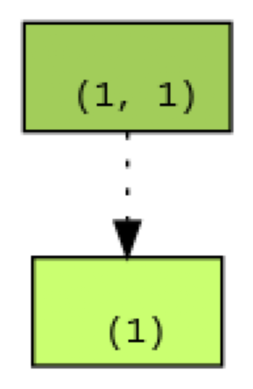

In [ ]:
import matplotlib.image as mpimg

img = mpimg.imread('simple_model.png')
imgplot = plt.imshow(img)
plt.axis('off')  # 축 제거
plt.show()

### 과제 2: 다층 신경망 확장

1. 목표: 기존의 다층 신경망에 은닉층을 하나 더 추가해보세요.

2. 단계:
    - 입력층 1개, 첫 번째 은닉층 3개, 두 번째 은닉층 2개, 출력층 1개로 구성된 신경망을 구현하세요.
    - 각 레이어의 가중치와 바이어스를 출력하세요.

3. 확인 사항:
    - 신경망이 올바르게 연결되었는지, 각 레이어의 출력 형태가 기대한 대로인지 확인하세요.

In [7]:
## 데이터 정규화 해보기
## batch normalization 추가 해보기
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import random_split
import torch.nn as nn
torch.manual_seed(42)

class SimpleDataset(Dataset):
    def __init__(self, num_samples=1000):
        self.x = torch.linspace(-5, 5, num_samples).reshape(-1, 2)
        self.y = 2 * self.x + 1 + torch.randn_like(self.x) * 0.5

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

full_dataset = SimpleDataset(num_samples = 1000)

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = random_split(
    full_dataset,
    [train_size, test_size]
)

train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = True)

print(train_loader.dataset.dataset.x.shape)

torch.Size([500, 2])


In [8]:
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3, 2)
        self.fc3 = nn.Linear(2, 1)
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
    # def _initialize_weights(self):
    #   for m in self.modules():
    #       if isinstance(m, nn.Linear):
    #           nn.init.xavier_uniform_(m.weight)  # Xavier 초기화
    #           if m.bias is not None:
    #               nn.init.constant_(m.bias, 0)  # 편향은 0으로 초기화

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def train_epoch(model, train_loader, criterion, optimizer):
    model.train()
    total_loss = 0
    for x_batch, y_batch in train_loader:
        predications = model(x_batch)
        loss = criterion(predications, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    return total_loss / len(train_loader)

def evaluate(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            predictions = model(x_batch)
            loss = criterion(predictions, y_batch)
            total_loss = loss.item()
    return total_loss / len(test_loader)


test_count = 10

for count in range(test_count):
  model = SimpleModel()
  criterion = nn.MSELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

  # ReduceLROnPlateau 초기화
  scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

  num_epochs = 100

  for epoch in range(1, num_epochs + 1):
      train_loss = train_epoch(model, train_loader, criterion, optimizer)
      test_loss = evaluate(model, test_loader, criterion)

      # 스케줄러 업데이트
      scheduler.step(test_loss)

      if epoch % 10 == 0 :
          print(f"Epoch {epoch}/{num_epochs} - Train Loss: {train_loss:.4f} - Test Loss: {test_loss: .4f}")

      if epoch % 10 == 0:
        checkpoint = {
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_loss': train_loss,
            'test_loss': test_loss
        }
        torch.save(checkpoint, f'checkpoint_epoch_{epoch}.pth')
        # print(f"Checkpoint saved at epoch {epoch}")

# torch.Size([500, 2])
# Epoch 100/100 - Train Loss: 13.8688 - Test Loss:  0.5509
# Epoch 100/100 - Train Loss: 0.2555 - Test Loss:  0.0992
# Epoch 100/100 - Train Loss: 0.2586 - Test Loss:  0.0702
# Epoch 100/100 - Train Loss: 0.2927 - Test Loss:  0.0800
# Epoch 100/100 - Train Loss: 13.9402 - Test Loss:  0.0633
# Epoch 100/100 - Train Loss: 133.1470 - Test Loss:  18.2602
# Epoch 100/100 - Train Loss: 9.1299 - Test Loss:  0.1097
# Epoch 100/100 - Train Loss: 9.0680 - Test Loss:  0.3097
# Epoch 100/100 - Train Loss: 134.0355 - Test Loss:  34.6282
# Epoch 100/100 - Train Loss: 134.3955 - Test Loss:  36.2574

Epoch 10/100 - Train Loss: 13.0527 - Test Loss:  4.0941
Epoch 20/100 - Train Loss: 11.3203 - Test Loss:  4.1150
Epoch 30/100 - Train Loss: 11.0223 - Test Loss:  5.9597
Epoch 40/100 - Train Loss: 10.7913 - Test Loss:  0.2449
Epoch 50/100 - Train Loss: 10.3610 - Test Loss:  1.8250
Epoch 60/100 - Train Loss: 10.5558 - Test Loss:  6.2640
Epoch 70/100 - Train Loss: 10.6277 - Test Loss:  1.6941
Epoch 80/100 - Train Loss: 10.8440 - Test Loss:  0.1008
Epoch 90/100 - Train Loss: 10.6095 - Test Loss:  5.6365
Epoch 100/100 - Train Loss: 10.5961 - Test Loss:  3.1170
Epoch 10/100 - Train Loss: 33.0189 - Test Loss:  5.6806
Epoch 20/100 - Train Loss: 32.9374 - Test Loss:  8.5555
Epoch 30/100 - Train Loss: 32.8175 - Test Loss:  2.3902
Epoch 40/100 - Train Loss: 32.7556 - Test Loss:  9.6444
Epoch 50/100 - Train Loss: 32.5890 - Test Loss:  6.8909
Epoch 60/100 - Train Loss: 33.0328 - Test Loss:  11.8361
Epoch 70/100 - Train Loss: 32.6175 - Test Loss:  6.4359
Epoch 80/100 - Train Loss: 32.8668 - Test Loss

In [ ]:
print(test_loader.dataset.dataset.x.shape)

x = torch.tensor([[0.1, 0.2]])

with torch.no_grad():
    pred = model(x)
    print(f"출력값: {pred.item()}")
# torch.Size([500, 2])
# 출력값: 1.306025505065918

SyntaxError: invalid syntax (<ipython-input-39-5202dc37c2f5>, line 1)

### 과제 3: 활성화 함수 비교

1. 목표: Sigmoid 함수와 ReLU 함수를 비교하여 그래프를 그려보세요.

2. 단계

- 동일한 입력 데이터에 대해 Sigmoid와 ReLU 함수를 각각 적용하세요.
- 두 함수의 그래프를 하나의 플롯에 겹쳐서 그려 차이점을 시각적으로 확인하세요.

3. 확인 사항:
두 함수의 출력 범위와 비선형성의 차이를 이해하세요.

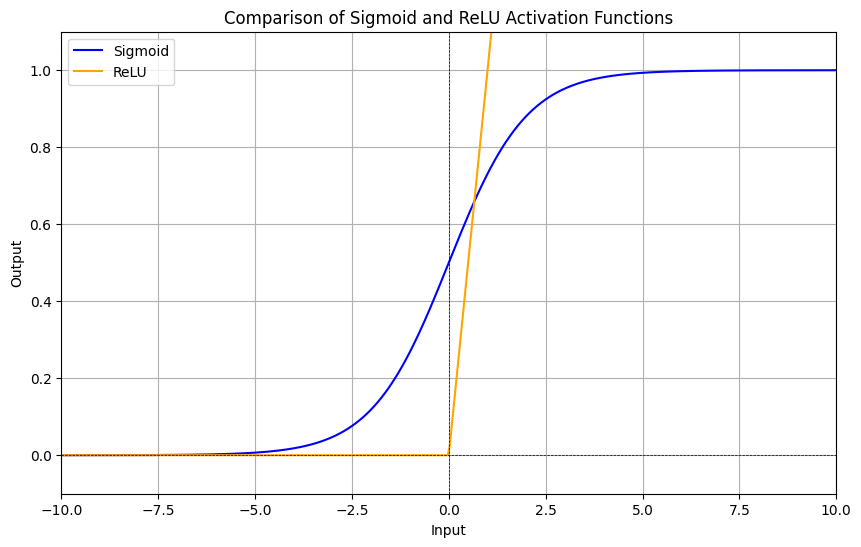

In [ ]:
import torch
import matplotlib.pyplot as plt

# 입력 데이터 생성
x = torch.linspace(-10, 10, 400)

# Sigmoid 함수 정의 (PyTorch 사용)
sigmoid_output = torch.sigmoid(x)

# ReLU 함수 정의 (PyTorch 사용)
relu_output = torch.relu(x)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x.numpy(), sigmoid_output.numpy(), label='Sigmoid', color='blue')
plt.plot(x.numpy(), relu_output.numpy(), label='ReLU', color='orange')
plt.title('Comparison of Sigmoid and ReLU Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
plt.show()

### 과제 4: Sequential 방식으로 다층 신경망 계산하기

1. 목표: 다층 신경망의 수동 계산을 통해 모델의 동작을 이해하세요.

2. 단계:
- 이전에 구현한 다층 신경망의 각 레이어의 가중치와 바이어스를 사용하여, 임의의 입력값에 대해 출력값을 수동으로 계산하세요.
- torch 텐서 연산을 활용하여 각 단계별 출력을 계산해보세요.

3. 확인 사항:
- 모델의 출력값과 수동 계산한 출력값이 일치하는지 확인하세요.


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import random_split
import torch.nn as nn

class SimpleDataset(Dataset):
    def __init__(self, num_samples=1000):
        self.x = torch.linspace(-10, 10, num_samples).reshape(-1, 2)
        self.y = 2 * self.x + 1 + torch.randn_like(self.x) * 0.5

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

full_dataset = SimpleDataset(num_samples = 1000)

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = random_split(
    full_dataset,
    [train_size, test_size]
)

train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = True)

print(train_loader.dataset.dataset.x.shape)

class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3, 2)
        self.fc3 = nn.Linear(2, 1)
        self._initialize_weights()

    # def _initialize_weights(self):
    #     for m in self.modules():
    #         if isinstance(m, nn.Linear):
    #             nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
    #             if m.bias is not None:
    #                 nn.init.constant_(m.bias, 0)
    def _initialize_weights(self):
      for m in self.modules():
          if isinstance(m, nn.Linear):
              nn.init.xavier_uniform_(m.weight)  # Xavier 초기화
              if m.bias is not None:
                  nn.init.constant_(m.bias, 0)  # 편향은 0으로 초기화

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def train_epoch(model, train_loader, criterion, optimizer):
    model.train()
    total_loss = 0
    for x_batch, y_batch in train_loader:
        predications = model(x_batch)
        loss = criterion(predications, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        total_loss += loss.item()
    return total_loss / len(train_loader)

def evaluate(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            predictions = model(x_batch)
            loss = criterion(predictions, y_batch)
            total_loss = loss.item()
    return total_loss / len(test_loader)


model = SimpleModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

num_epochs = 100

for epoch in range(1, num_epochs + 1):
    train_loss = train_epoch(model, train_loader, criterion, optimizer)
    test_loss = evaluate(model, test_loader, criterion)

    if epoch == num_epochs :
        print(f"Epoch {epoch}/{num_epochs} - Train Loss: {train_loss:.4f} - Test Loss: {test_loss: .4f}")

    if epoch % 10 == 0:
      checkpoint = {
          'epoch': epoch,
          'model_state_dict': model.state_dict(),
          'optimizer_state_dict': optimizer.state_dict(),
          'train_loss': train_loss,
          'test_loss': test_loss
      }
      torch.save(checkpoint, f'checkpoint_epoch_{epoch}.pth')



torch.Size([500, 2])
Epoch 100/100 - Train Loss: 7.8106 - Test Loss:  0.1477


In [ ]:
x = torch.tensor([[0.1, 0.2]])

with torch.no_grad():
    pred = model(x)
    print(f"출력값: {pred.item()}")
print("=====================")
print(model.parameters)
print("=====================")

W1 = model.fc1.weight
b1 = model.fc1.bias


W2 = model.fc2.weight
b2 = model.fc2.bias

W3 = model.fc3.weight
b3 = model.fc3.bias


x = torch.mm(x, W1.T) + b1
x = torch.relu(x)
x = torch.mm(x, W2.T) + b2
x = torch.relu(x)
x = torch.mm(x, W3.T) + b3
print(f"결과값: {x.item()}")


# 출력값: 1.4630928039550781
# =====================
# <bound method Module.parameters of SimpleModel(
#   (fc1): Linear(in_features=2, out_features=3, bias=True)
#   (fc2): Linear(in_features=3, out_features=2, bias=True)
#   (fc3): Linear(in_features=2, out_features=1, bias=True)
# )>
# =====================
# 결과값: 1.4630928039550781

출력값: 1.4630928039550781
<bound method Module.parameters of SimpleModel(
  (fc1): Linear(in_features=2, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=1, bias=True)
)>
결과값: 1.4630928039550781


## 참고자료
- [PyTorch 데이터셋/데이터로더 문서](https://pytorch.org/docs/stable/data.html)
- [PyTorch 모델 저장/불러오기 튜토리얼](https://pytorch.org/tutorials/beginner/saving_loading_models.html)
